In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from dice_proba import *

In [2]:
MAX_MODIF = 12
prob_map = [
    [
        prob_win(Dice(6, 1, i), Dice(6, 1, j)) for i in range(MAX_MODIF)
    ] for j in range(MAX_MODIF)
]

**Вероятности успешной атаки в Civilization: Новый Рассвет**

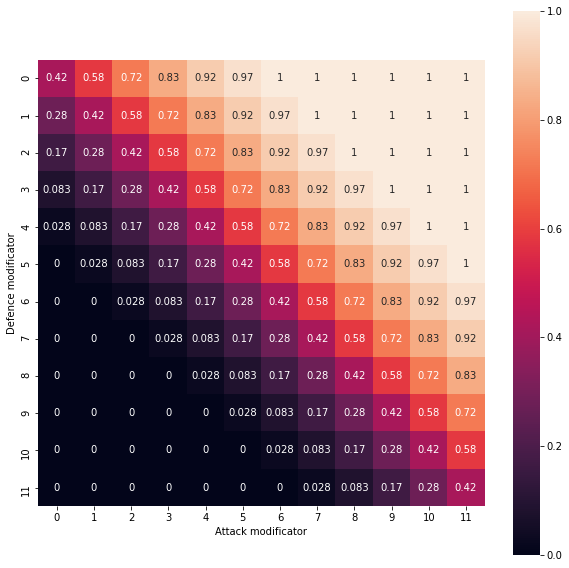

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(prob_map, annot=True, square=True)
plt.xlabel("Attack modificator")
plt.ylabel("Defence modificator");

In [4]:
def prob_dnd_hit(dice, ac):
    # 0.05 for critical hit and miss
    return min(0.95, round(max(0.05, 1 - prob_less(dice, ac)), 2))

In [5]:
MIN_AC = 10
MAX_AC = 30

dnd_hit_prob_map = [
    [
        prob_dnd_hit(Dice(20, 1, i), j) for i in range(10)
    ] for j in range(MIN_AC, MAX_AC)
]

In [6]:
dnd_hit_data = pd.DataFrame(dnd_hit_prob_map)
dnd_hit_data.columns = [f"+{i}" for i in dnd_hit_data.columns]
dnd_hit_data.set_index(pd.Index([i for i in range(MIN_AC, MAX_AC) ]), inplace=True)

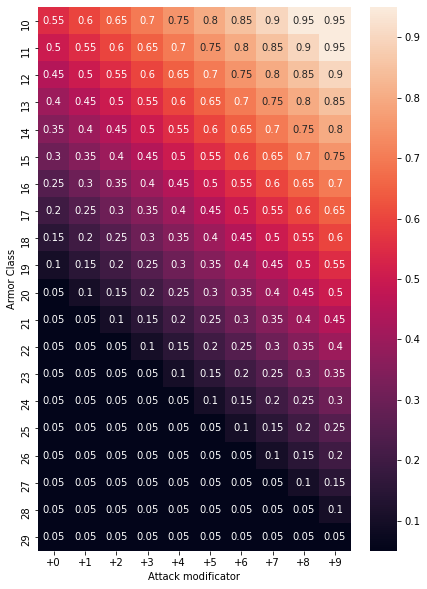

In [7]:
plt.figure(figsize=(7, 10))
sns.heatmap(dnd_hit_data, annot=True, square=False)
plt.xlabel("Attack modificator")
plt.ylabel("Armor Class");